In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter

In [125]:
# Read in CSV file

df = pd.read_csv('plate9290_RVs.csv').drop(['Unnamed: 0', 'Plate ID'], axis=1)

In [126]:
df = df.sort_values(['Target ID'], ascending=True)

In [127]:
df

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s)
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,0.010245
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080,0.019952
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830,0.018672
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440,0.008684
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565,0.009636
...,...,...,...,...
3393,apo25m.5226.150-08-RV.2M03415658+4626067,57732,-26.530085,0.016809
3392,apo25m.5226.150-08-RV.2M03415658+4626067,57706,-26.743143,0.010706
3406,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243,0.021124
3398,apo25m.5226.150-08-RV.2M03415658+4626067,57789,-26.565876,0.009245


## Step 1
- Calculate ΔRV_j = RV_j - < RV >
- Plot ΔRV vs MJD, try to locate pattern

#### Notes
- j denotes epoch (MJD?)
- 'epoch', an arbitrarily fixed date relative to which stellar/planetary measurements are expressed

#### Questions
- Does it matter that uncertainty is for OBSVREL not OBSVHELIO? --> no

In [128]:
# Identify list of unique targets

unique_targets = Counter(df['Target ID'])
unique_targets_list = unique_targets.keys()

In [129]:
# unique_targets

In [130]:
len(unique_targets)

213

In [131]:
# Create list of RV_j values

RV_j = list(df['OBSVHELIO (km/s)'])

In [132]:
# Calculate <RV>, i.e. weighted RV_j values

weightedRVs = []

for target in unique_targets_list:
    target_df = df[df['Target ID'] == target]
    targetRV_j = list(target_df['OBSVHELIO (km/s)'])
    sigma = list(target_df['OBSVREL Error (km/s)'])
    weight = [1 / (sigma[s]**2) for s in range(len(sigma))]
    weightedavg = sum([targetRV_j[i] * weight[i] for i in range(len(targetRV_j))]) / sum(weight)
    for j in range(16):
        weightedRVs.append(weightedavg)

In [133]:
# Check list of <RV> values

# weightedRVs

In [134]:
# Append <RV> values to dataframe

df['<RV>'] = weightedRVs
# df['<RV>'] = [abs(rv) for rv in weightedRVs] # Don't want the abs value!

In [135]:
df

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,0.010245,-86.476541
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080,0.019952,-86.476541
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830,0.018672,-86.476541
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440,0.008684,-86.476541
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565,0.009636,-86.476541
...,...,...,...,...,...
3393,apo25m.5226.150-08-RV.2M03415658+4626067,57732,-26.530085,0.016809,-26.537180
3392,apo25m.5226.150-08-RV.2M03415658+4626067,57706,-26.743143,0.010706,-26.537180
3406,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243,0.021124,-26.537180
3398,apo25m.5226.150-08-RV.2M03415658+4626067,57789,-26.565876,0.009245,-26.537180


In [136]:
# Calculate ΔRV_j = RV_j - < RV >

deltaRV_j = [RV_j[i] - weightedRVs[i] for i in range(len(RV_j))]

In [137]:
# Append ΔRV_j values to dataframe as ΔRV

df['ΔRV'] = deltaRV_j

In [138]:
# Check updated dataframe

df.sort_values('ΔRV', ascending=False)

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>,ΔRV
1959,apo25m.5226.150-08-RV.2M03335959+4534540,58006,15.602287,3.578358,-28.386229,43.988516
1512,apo25m.5226.150-08-RV.2M03322119+4723171,58032,17.542360,1.956752,-19.569800,37.112160
991,apo25m.5226.150-08-RV.2M03303128+4559542,58143,20.871874,0.993278,-9.691109,30.562983
2162,apo25m.5226.150-08-RV.2M03343562+4544527,57734,-0.000636,1.380878,-29.698267,29.697631
3149,apo25m.5226.150-08-RV.2M03400642+4701351,58087,-17.536911,2.266302,-46.019250,28.482339
...,...,...,...,...,...,...
952,apo25m.5226.150-08-RV.2M03302753+4708196,58032,-42.902916,2.925044,-13.774434,-29.128482
1822,apo25m.5226.150-08-RV.2M03332225+4725193,58114,-38.664597,1.081097,-6.147122,-32.517475
1518,apo25m.5226.150-08-RV.2M03322119+4723171,58114,-55.707108,5.909284,-19.569800,-36.137308
1784,apo25m.5226.150-08-RV.2M03331168+4604257,58032,-26.816109,1.158200,13.196386,-40.012495


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

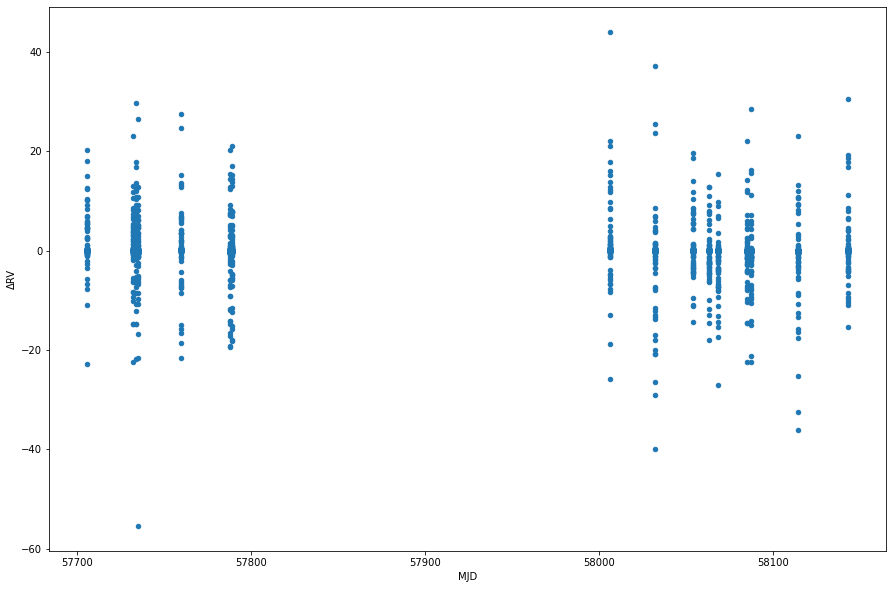

In [139]:
# Plot ΔRV versus epoch

df.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter', figsize=(15,10))

In [174]:
# Consider limiting ΔRV range?

df_cutoff = df.loc[(df['ΔRV'] < 1.0) & (df['ΔRV'] > -1.0)]

df_cutoff.sort_values('ΔRV')

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>,ΔRV
369,apo25m.5226.150-08-RV.2M03281678+4513003,57732,1.472417,0.065090,2.456475,-0.984058
3302,apo25m.5226.150-08-RV.2M03411209+4530317,57789,-33.110073,0.224766,-32.182084,-0.927989
1756,apo25m.5226.150-08-RV.2M03330449+4732443,58085,-56.091194,0.064767,-55.192485,-0.898709
1689,apo25m.5226.150-08-RV.2M03325400+4641080,58054,-2.538757,1.030917,-1.664955,-0.873803
1575,apo25m.5226.150-08-RV.2M03323778+4716306,58006,44.638680,0.008422,45.489041,-0.850361
...,...,...,...,...,...,...
419,apo25m.5226.150-08-RV.2M03282484+4535044,57735,-8.687350,0.660753,-9.577363,0.890013
2630,apo25m.5226.150-08-RV.2M03371083+4537137,57789,-14.980543,0.011571,-15.937572,0.957029
3110,apo25m.5226.150-08-RV.2M03400345+4520415,57789,-1.775444,0.734468,-2.740936,0.965492
2809,apo25m.5226.150-08-RV.2M03380104+4603136,58054,-11.825833,0.002948,-12.807833,0.982000


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

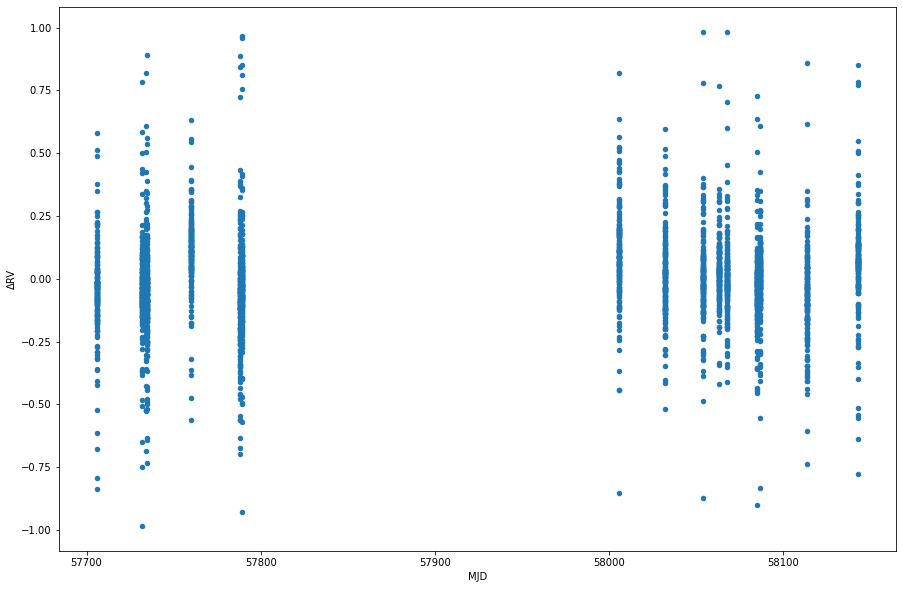

In [175]:
# Plot ΔRV versus epoch for cutoff dataframe

df_cutoff.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter', figsize=(15,10))

## Step 2
- Condense all ΔRVs into a single point per MJD

### Step 2.5
- Calculate statistical/standard error: sigma_< RV > = sqrt(1/sum(weight))
- Plot statistical error bars

In [176]:
# Identify list of unique MJDs

unique_mjd = Counter(df['MJD'])
unique_mjd_list = unique_mjd.keys()

In [177]:
unique_mjd_list

dict_keys([57706, 58143, 58114, 58087, 58085, 58063, 58054, 58032, 58068, 57789, 57788, 57760, 57735, 57734, 57732, 58006])

In [178]:
# Obtain weighted average ΔRV for each MJD

combined_weightedRVs = []
combined_staterror = []

for mjd in unique_mjd_list:
    mjd_df = df_cutoff[df_cutoff['MJD'] == mjd]
    mjd_RVs = list(mjd_df['ΔRV'])
    mjd_sigma = list(mjd_df['OBSVREL Error (km/s)'])
    weight = [1 / (mjd_sigma[s]**2) for s in range(len(mjd_sigma))]
    sigmaRV = 1000*np.sqrt(1/sum(weight))
    # print('Sum of ΔRV for MJD', mjd, ':', sum(mjd_RVs))
    # print('Sum of weights:', sum(weight))
    combined_weightedavg = 1000*sum([mjd_RVs[r] * weight[r] for r in range(len(mjd_RVs))]) / sum(weight) #[r] for r in range(len(mjd_sigma)))
    # combined_weightedavg = sum([mjd_RVs[r] * mjd_sigma[r] for r in range(len(mjd_RVs))]) / sum(mjd_sigma) #[r] for r in range(len(mjd_sigma)))
    combined_weightedRVs.append(combined_weightedavg)
    combined_staterror.append(sigmaRV)

In [179]:
combined_weightedRVs # Expect order of 1-10 m/s; actually ~10-100 m/s, why??

[-81.66852832781822,
 34.91041282210907,
 -60.822071546428,
 72.75976914046947,
 8.806468256408392,
 73.97118453358496,
 42.6725856967026,
 17.860295229205164,
 28.686699472083408,
 -46.7292834470181,
 -131.29241513199347,
 80.55650702745567,
 -94.05405386715728,
 -36.65473318220431,
 -114.90610483993828,
 62.23628622150652]

In [180]:
combined_staterror

[0.48695834807997634,
 0.3854235364641232,
 0.8517645265874908,
 0.42395272953424823,
 0.4648752493675228,
 0.3691929630747168,
 0.41203693579317396,
 0.6268982904878597,
 0.4201256040928953,
 0.44061881318146084,
 0.9204464694618404,
 0.5557634243969821,
 0.522900763204256,
 0.45487678022281275,
 0.39755938536391766,
 0.46073025210913743]

In [181]:
# Create dataframe for MJD and combined weighted ΔRV values

weightedavg_data = [unique_mjd_list, combined_weightedRVs, combined_staterror]
weightedavg_df = pd.DataFrame(weightedavg_data).transpose()
weightedavg_df.columns = ['MJD', 'Combined ΔRV (m/s)', 'Combined σRV (m/s)']

In [182]:
weightedavg_df

,MJD,Combined ΔRV (m/s),Combined σRV (m/s)
0,57706.0,-81.668528,0.486958
1,58143.0,34.910413,0.385424
2,58114.0,-60.822072,0.851765
3,58087.0,72.759769,0.423953
4,58085.0,8.806468,0.464875
5,58063.0,73.971185,0.369193
6,58054.0,42.672586,0.412037
7,58032.0,17.860295,0.626898
8,58068.0,28.686699,0.420126
9,57789.0,-46.729283,0.440619


<AxesSubplot:xlabel='MJD', ylabel='Combined ΔRV (m/s)'>

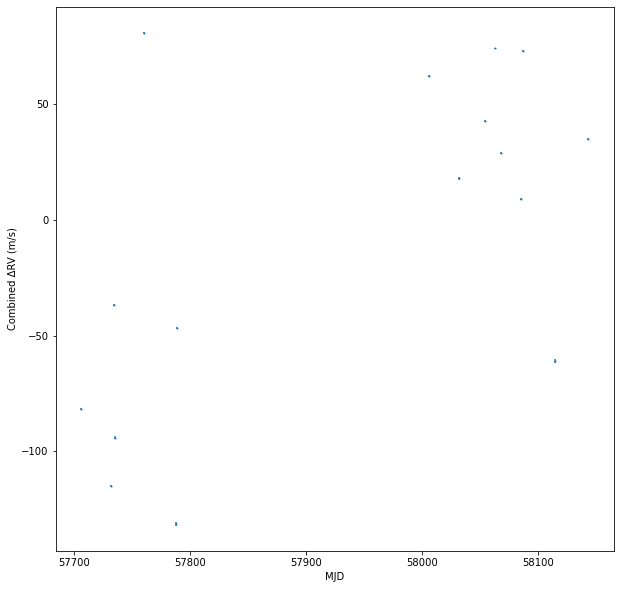

In [183]:
# Plot combined weighted ΔRV values vs MJD, with statistical error

weightedavg_df.plot(x='MJD', y='Combined ΔRV (m/s)', yerr='Combined σRV (m/s)', kind='scatter', s=1, figsize=(10,10)) # Statistical error very hard to see

## Step 3
- Fit line to free parameters (i.e. x & y values), check gradient for anything interesting?

In [184]:
x = weightedavg_df['MJD']
y = weightedavg_df['Combined ΔRV (m/s)']
yerr = weightedavg_df['Combined σRV (m/s)']

In [185]:
a, b = np.polyfit(x, y, 1)

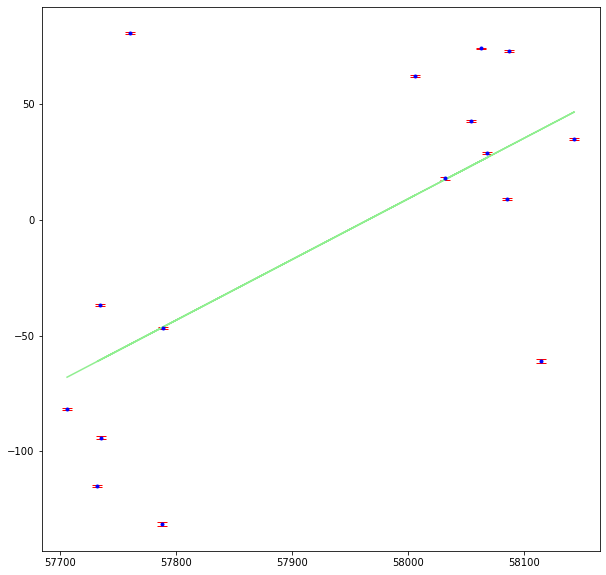

In [186]:
plt.figure(figsize=(10, 10))
plt.errorbar(x, y, yerr, fmt='.', color='blue', ecolor='red', capsize=5)
plt.plot(x, a*x+b, color='lightgreen')

In [187]:
# Gradient - not sure how to interpret?

print('Gradient of slope:', a, '[m/MJD]')

Gradient of slope: 0.2620433187086763 [m/MJD]


## Step 4
- Check distribution of ~200 data points used to create combined ΔRV
    - Don't expect Gaussian, but should be relatively well-behaved (big tail suggests outlier that should be removed)
- Check distribution of all ΔRV per MJD

### Results
- All subhistograms centred around 0 ΔRV
- Some have certain big outliers
- What is the cutoff?
- Should I cut off overall, or for each subhistogram?

In [188]:
# Counter(df_cutoff['ΔRV'])

In [189]:
ΔRVdist = df['ΔRV']

(-50.0, 50.0)

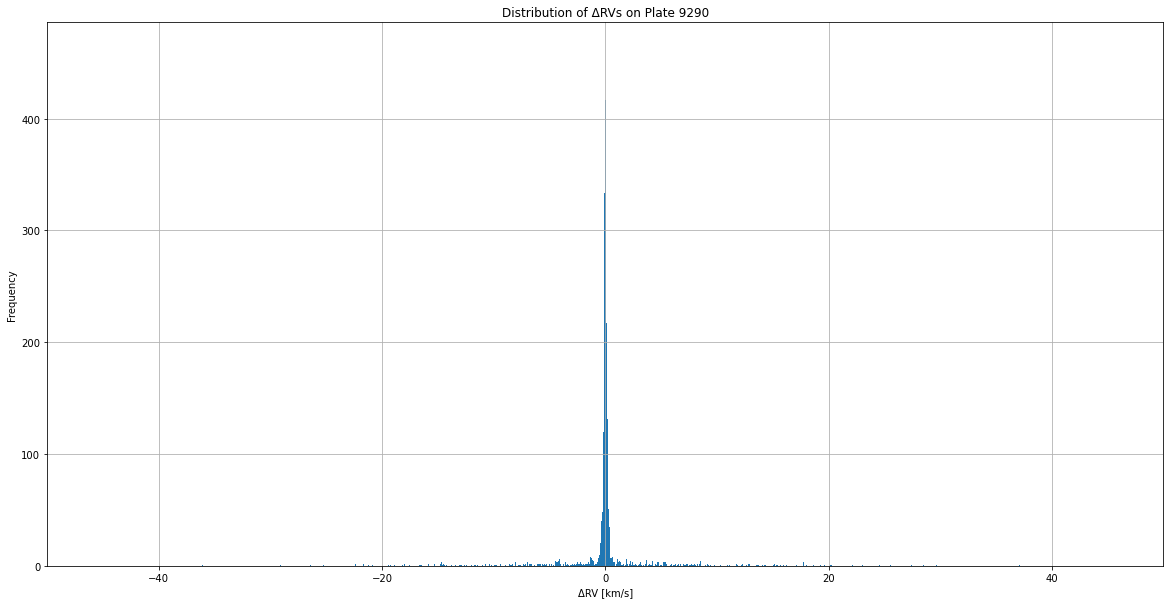

In [190]:
plt.figure(figsize=(20, 10))
ΔRVdist.plot.hist(grid=True, bins=2000, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290')
plt.xlabel('ΔRV [km/s]')
plt.xlim(-50, 50)

### Distributions of ΔRV per MJD

In [191]:
ΔRV_57706 = df[df['MJD'] == 57706]['ΔRV']*1000

Text(0.5, 0, 'ΔRV [m/s]')

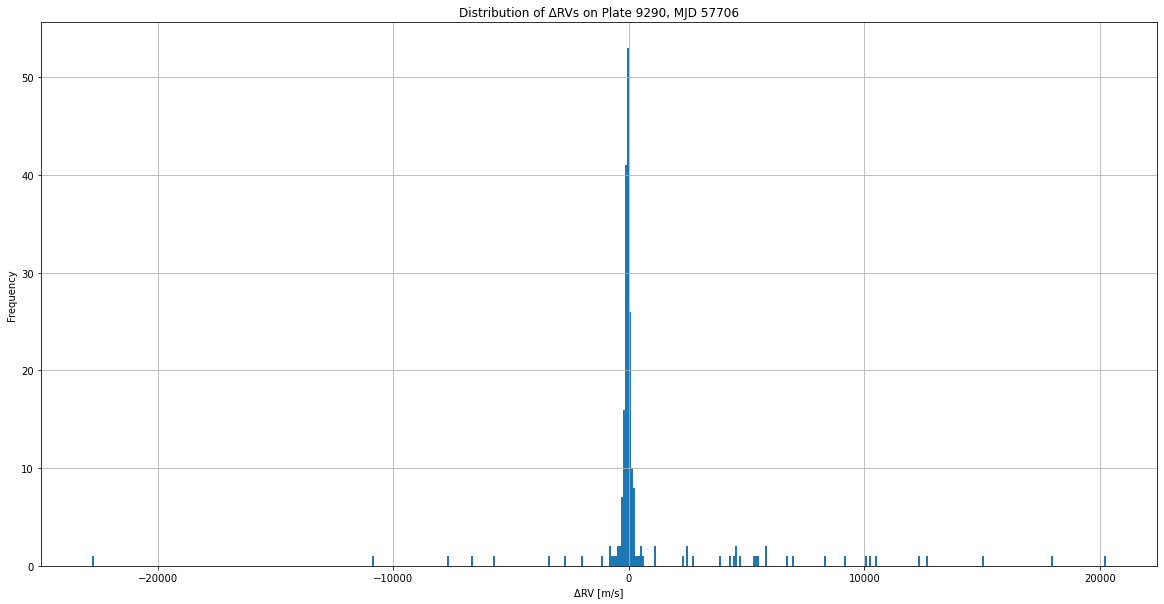

In [192]:
df_57706 = df[df['MJD'] == 57706]
ΔRV_57706 = df[df['MJD'] == 57706]['ΔRV']*1000
plt.figure(figsize=(20, 10))
ΔRV_57706.plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 57706')
plt.xlabel('ΔRV [m/s]')

Text(0.5, 0, 'ΔRV [km/s]')

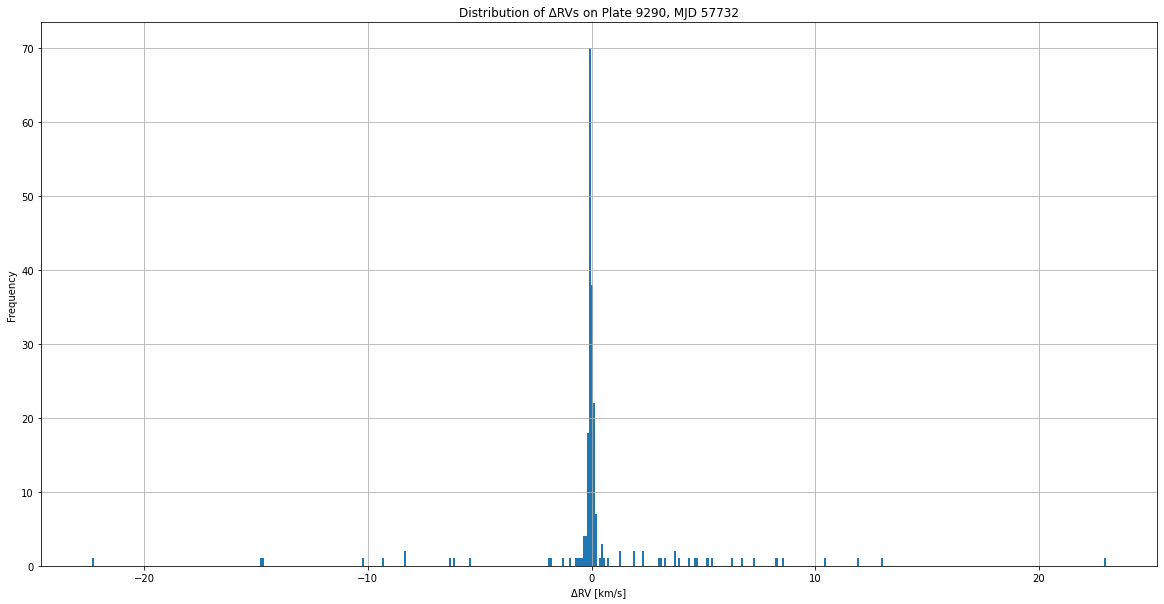

In [193]:
df_57732 = df[df['MJD'] == 57732]
plt.figure(figsize=(20, 10))
df_57732['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 57732')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

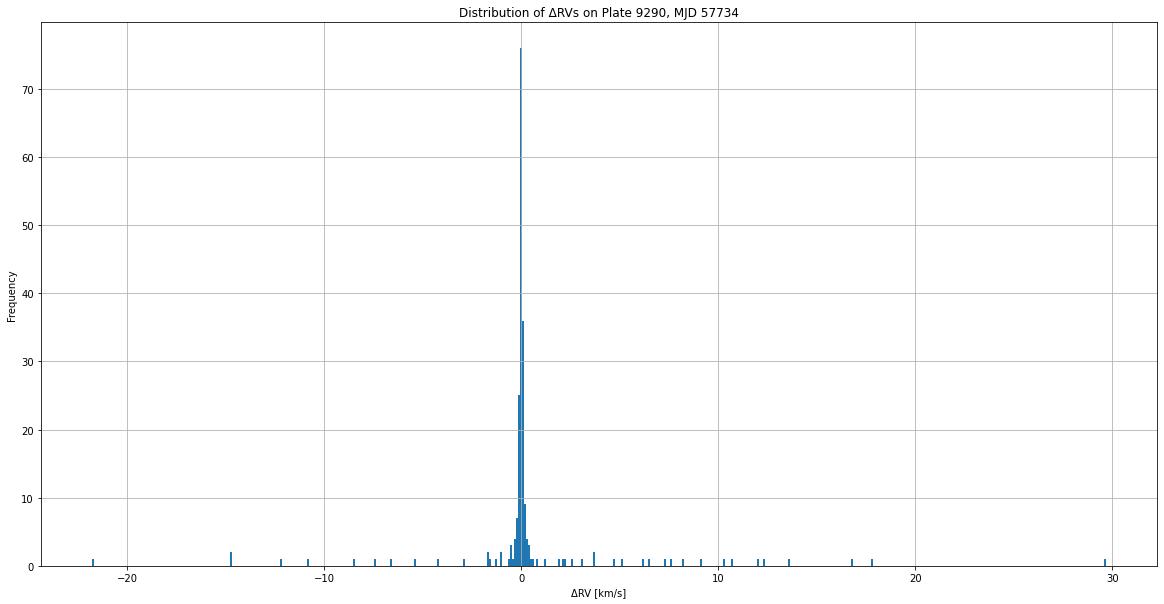

In [194]:
df_57734 = df[df['MJD'] == 57734]
plt.figure(figsize=(20, 10))
df_57734['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 57734')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

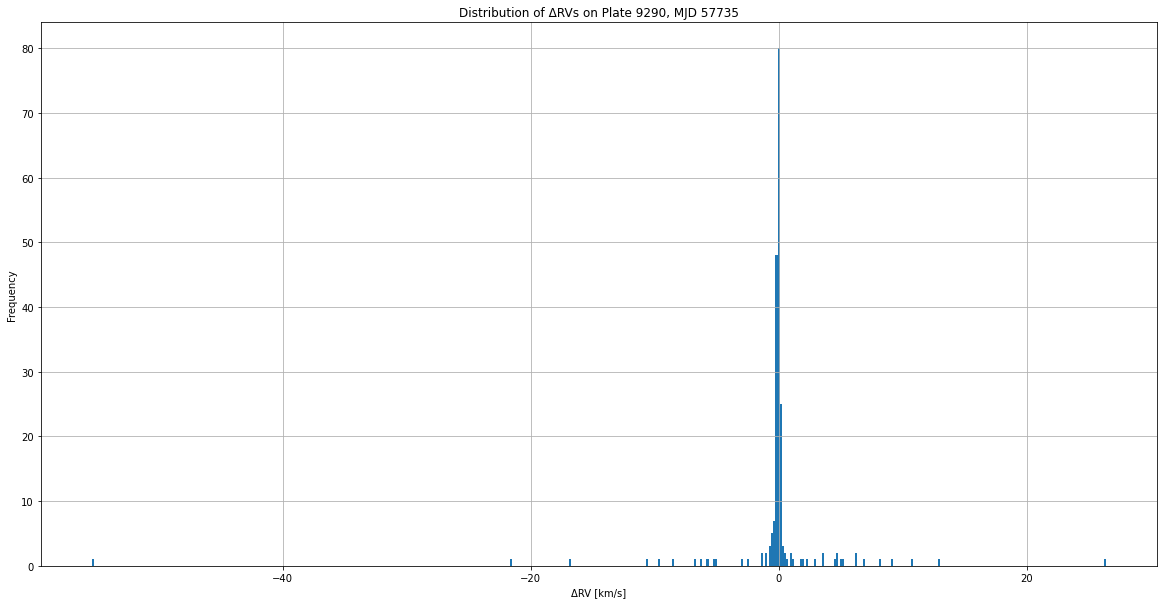

In [79]:
df_57735 = df[df['MJD'] == 57735]
plt.figure(figsize=(20, 10))
df_57735['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 57735')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

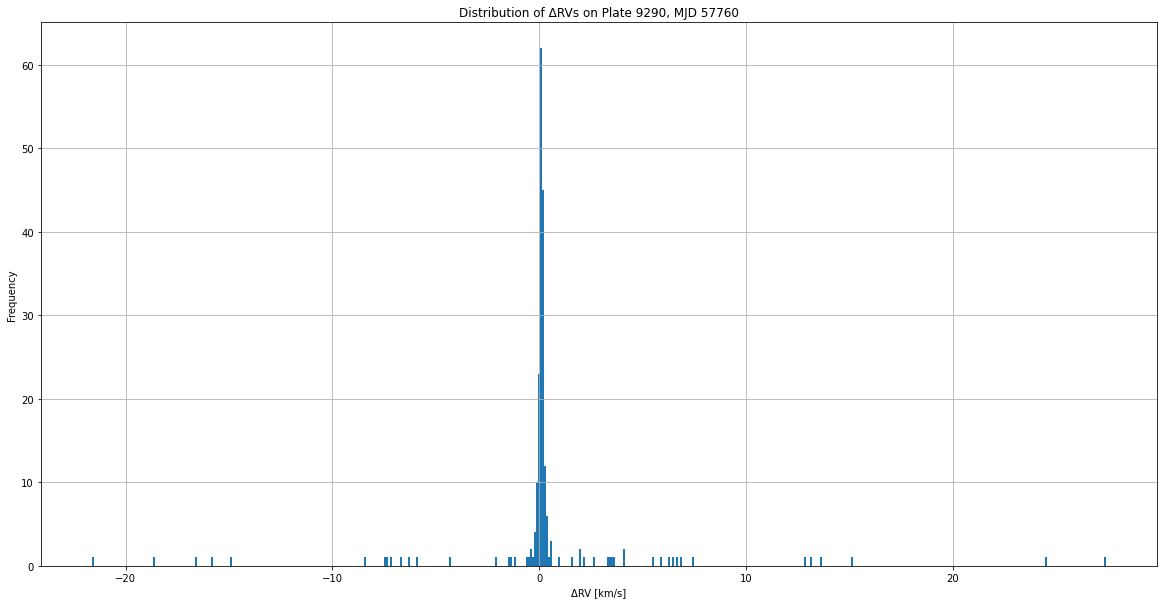

In [78]:
df_57760 = df[df['MJD'] == 57760]
plt.figure(figsize=(20, 10))
df_57760['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 57760')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

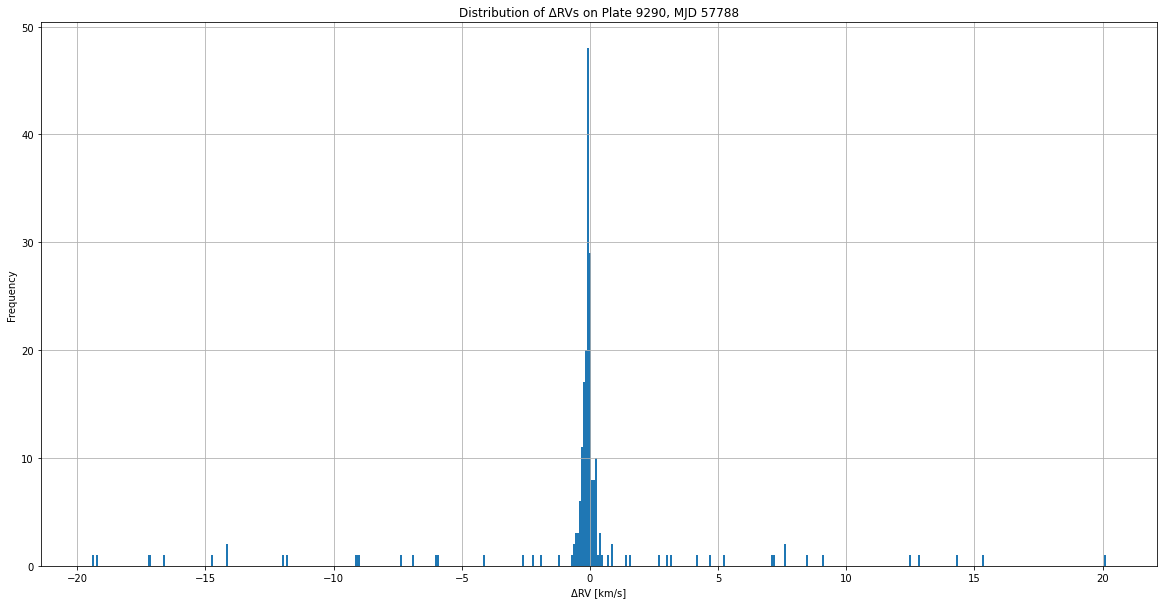

In [68]:
df_57788 = df[df['MJD'] == 57788]
plt.figure(figsize=(20, 10))
df_57788['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 57788')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

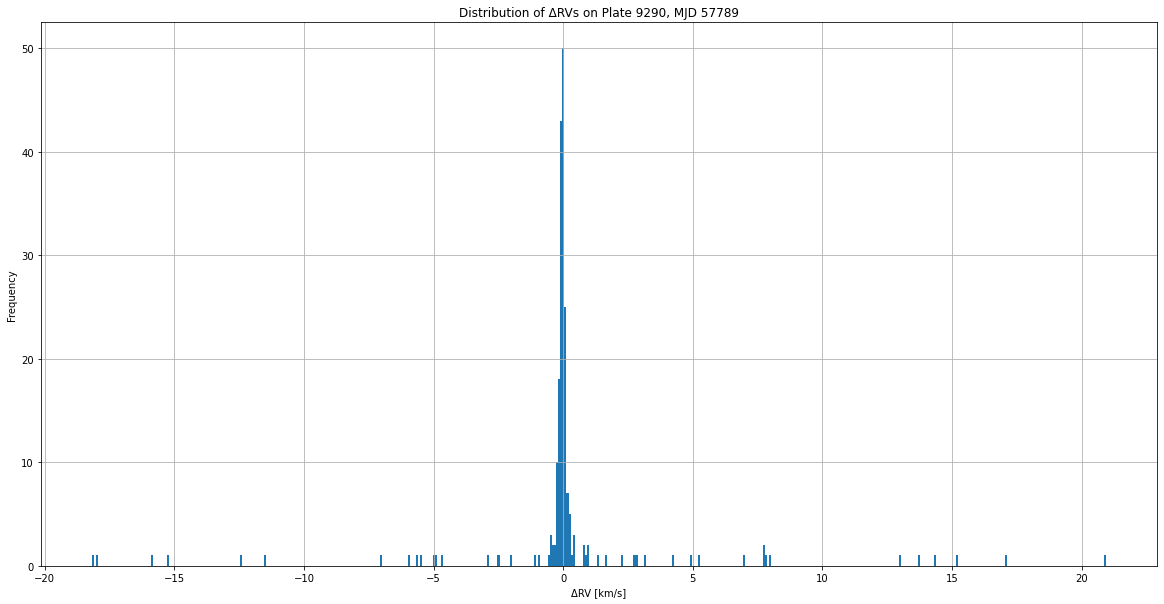

In [67]:
df_57789 = df[df['MJD'] == 57789]
plt.figure(figsize=(20, 10))
df_57789['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 57789')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

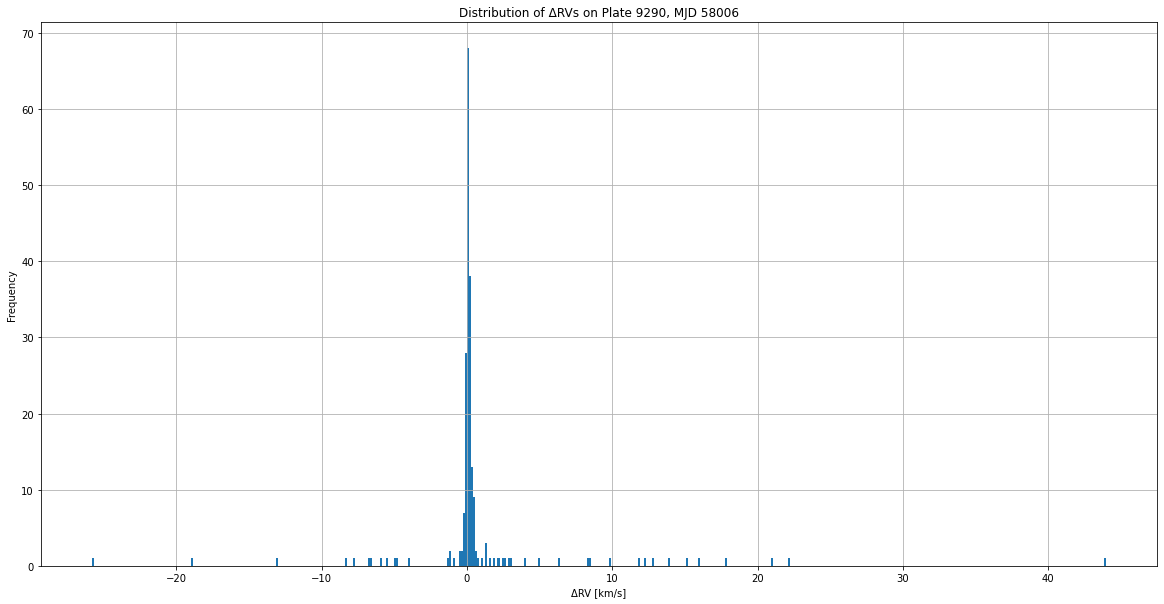

In [69]:
df_58006 = df[df['MJD'] == 58006]
plt.figure(figsize=(20, 10))
df_58006['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 58006')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

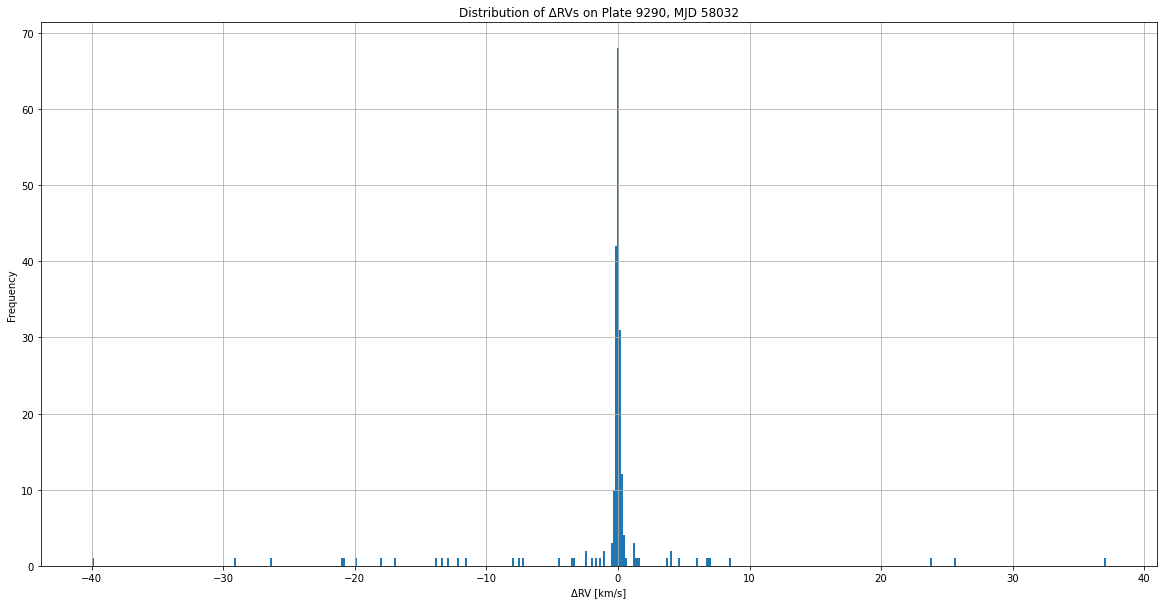

In [70]:
df_58032 = df[df['MJD'] == 58032]
plt.figure(figsize=(20, 10))
df_58032['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 58032')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

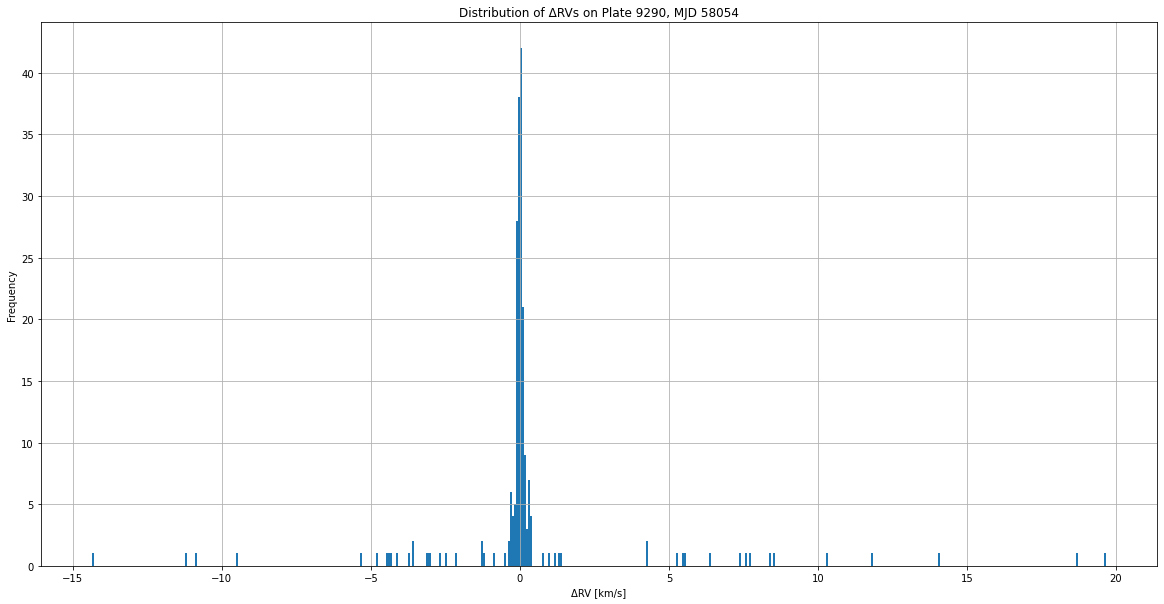

In [71]:
df_58054 = df[df['MJD'] == 58054]
plt.figure(figsize=(20, 10))
df_58054['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 58054')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

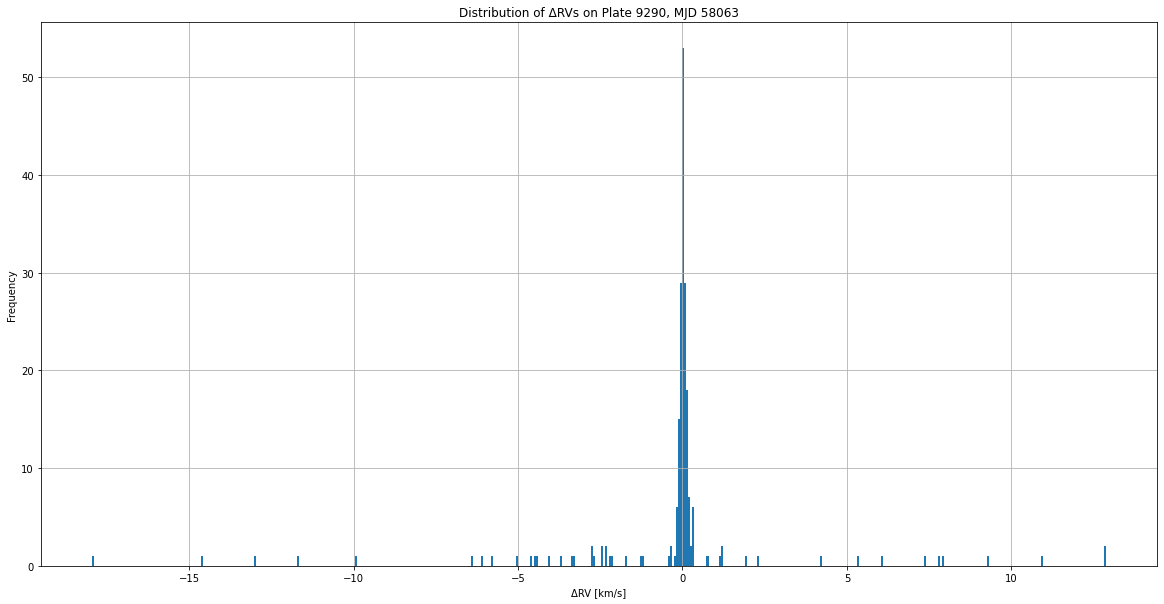

In [72]:
df_58063 = df[df['MJD'] == 58063]
plt.figure(figsize=(20, 10))
df_58063['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 58063')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

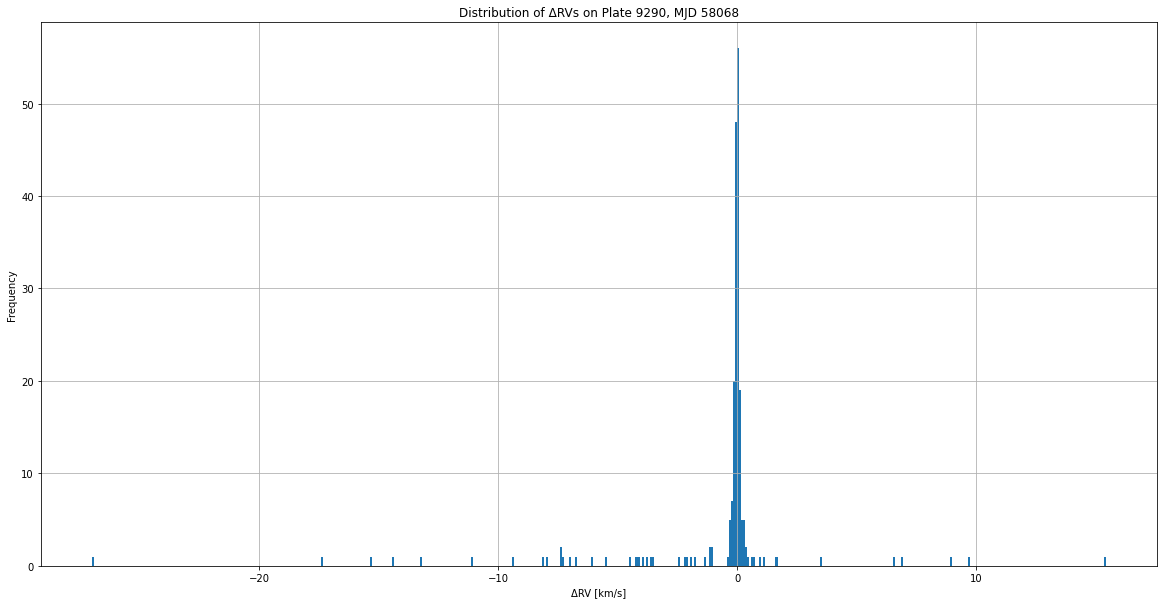

In [73]:
df_58068 = df[df['MJD'] == 58068]
plt.figure(figsize=(20, 10))
df_58068['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 58068')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

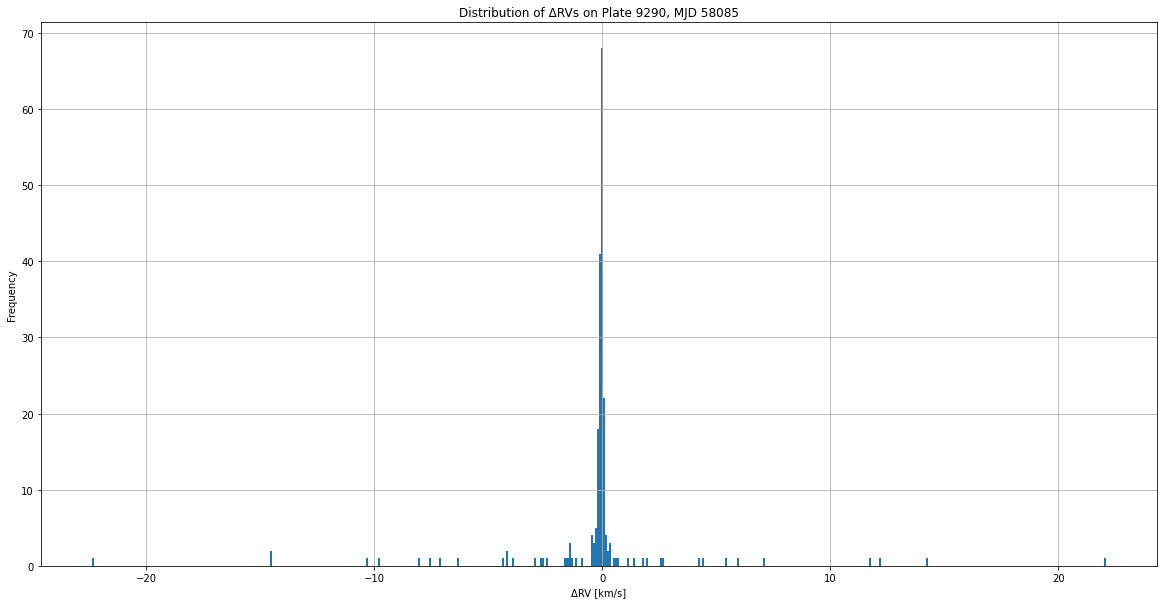

In [74]:
df_58085 = df[df['MJD'] == 58085]
plt.figure(figsize=(20, 10))
df_58085['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 58085')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

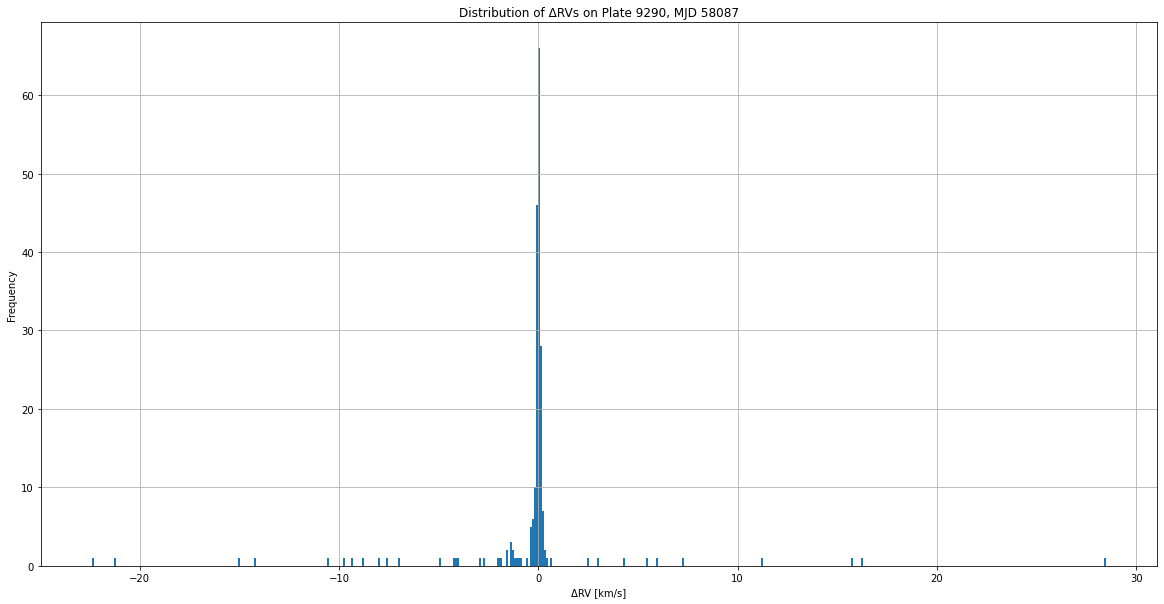

In [75]:
df_58087 = df[df['MJD'] == 58087]
plt.figure(figsize=(20, 10))
df_58087['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 58087')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

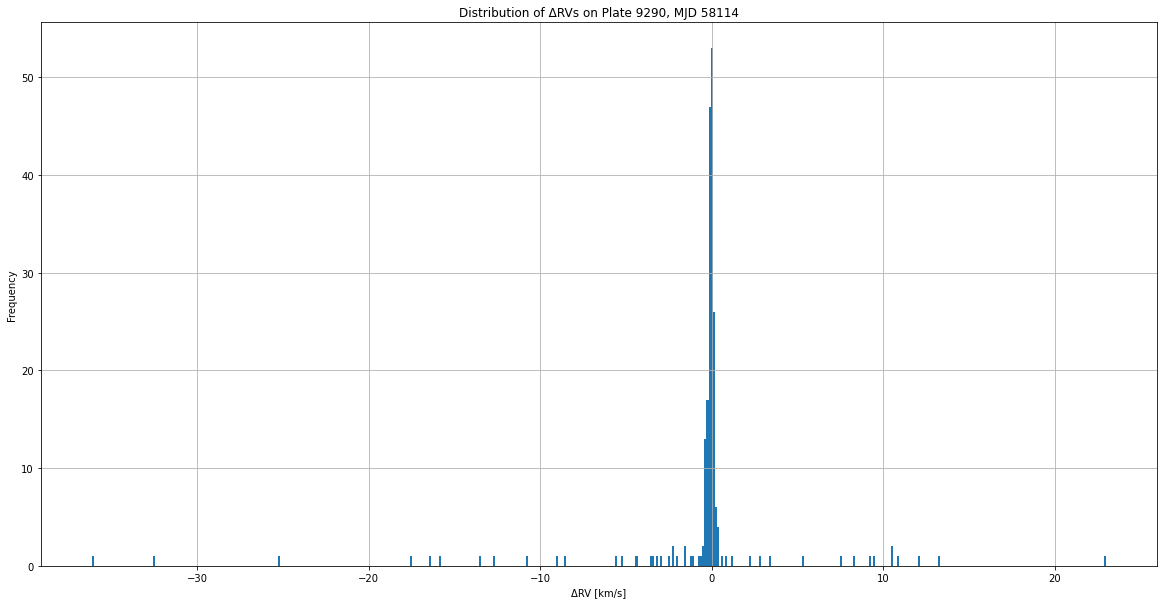

In [76]:
df_58114 = df[df['MJD'] == 58114]
plt.figure(figsize=(20, 10))
df_58114['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 58114')
plt.xlabel('ΔRV [km/s]')

Text(0.5, 0, 'ΔRV [km/s]')

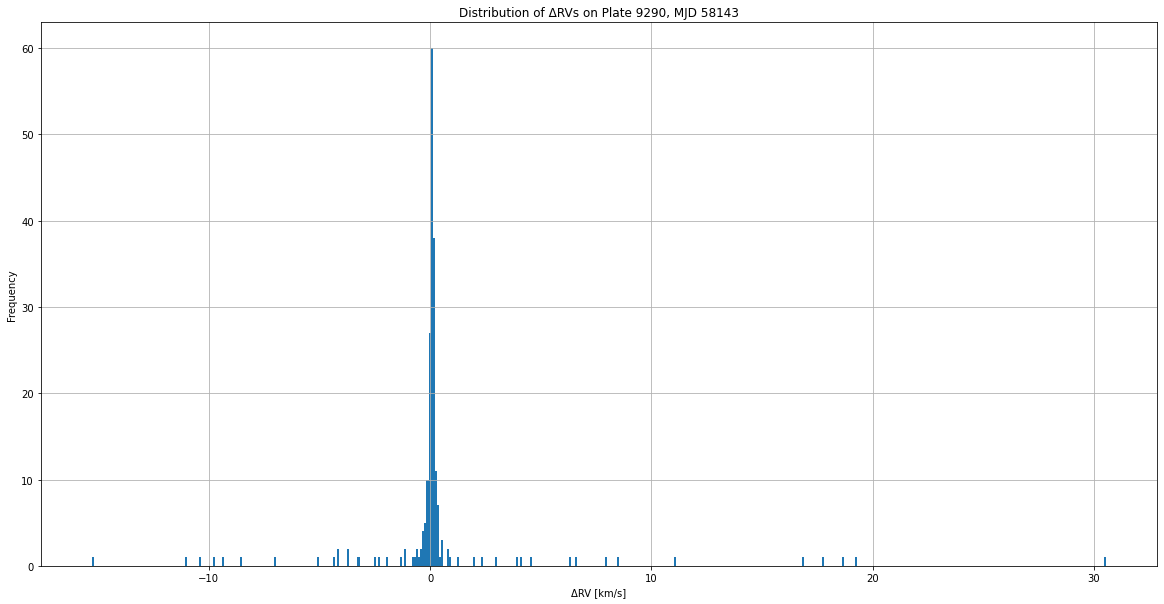

In [77]:
df_58143 = df[df['MJD'] == 58143]
plt.figure(figsize=(20, 10))
df_58143['ΔRV'].plot.hist(grid=True, bins=500, rwidth=1)
plt.title('Distribution of ΔRVs on Plate 9290, MJD 58143')
plt.xlabel('ΔRV [km/s]')

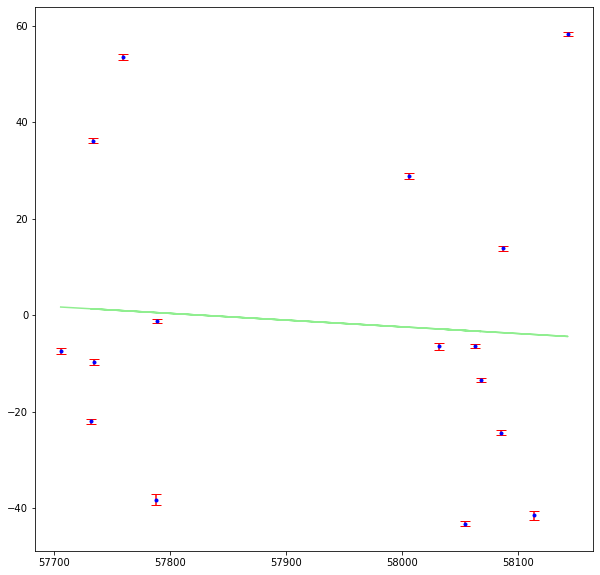

In [117]:
# Cutoff to |250m/s|

x = weightedavgcutoff_df['MJD']
y = weightedavgcutoff_df['Combined ΔRV (m/s)']
yerr = weightedavgcutoff_df['Combined σRV (m/s)']
a, b = np.polyfit(x, y, 1)
plt.figure(figsize=(10, 10))
plt.errorbar(x, y, yerr, fmt='.', color='blue', ecolor='red', capsize=5)
plt.plot(x, a*x+b, color='lightgreen')

## Step 5
- Pick some RV standard stars (~10)
- Apply correction (50/100 m correction is large for typical statistical error of APOGEE)

## Step 6
- Try repeating this process for other plates
- Combine plots for all plates (fill in gaps in MJD)
    - Difference in N measurements per object doesn't matter bc statistical error will be larger with fewer data points, makes up for it

## Step ?
- Try PCA

In [41]:
features = ['MJD', 'ΔRV']#, 'OBSVREL Error (km/s)', '<RV>']

In [42]:
x2 = df.loc[:, features].values

In [43]:
y2 = df.loc[:, ['Target ID']].values

In [44]:
x2 = StandardScaler().fit_transform(x2)

In [45]:
x2.shape

(3408, 2)

In [46]:
# Check standard dev is 1.0

np.mean(x2), np.std(x2)

(1.9546180011006278e-18, 1.0)

In [47]:
feat_cols = ['feature'+str(i) for i in range(x2.shape[1])]

In [48]:
normalised_data = pd.DataFrame(x2,columns=feat_cols)

In [49]:
normalised_data.tail()

,feature0,feature1
3403,-1.212567,0.010070
3404,-1.370993,-0.038174
3405,1.115074,-0.005590
3406,-0.865249,0.001966
3407,1.291780,0.036056


In [50]:
pca = PCA(n_components = 2)

In [51]:
principalComponents = pca.fit_transform(x2)

In [52]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [53]:
principalDf.tail()

,principal component 1,principal component 2
3403,-0.864535,0.850293
3404,-0.942445,0.996431
3405,0.792429,-0.784524
3406,-0.613213,0.610433
3407,0.887931,-0.938921


In [54]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.52070766 0.47929234]


<Figure size 432x288 with 0 Axes>

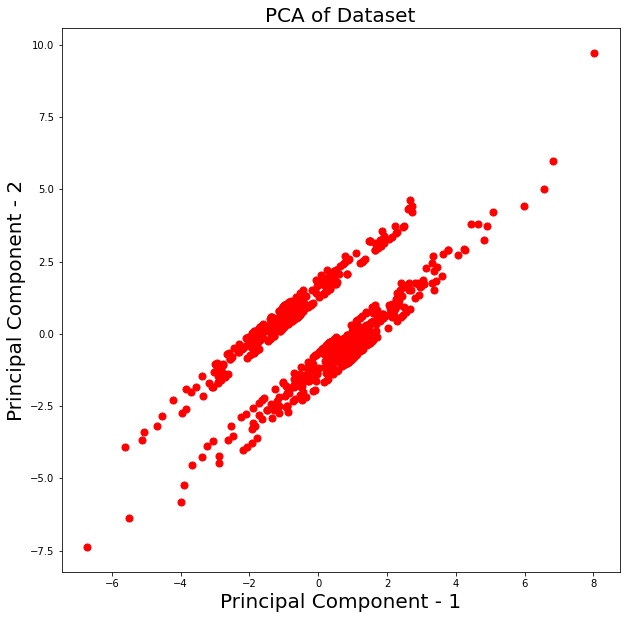

In [55]:
plt.figure()
plt.figure(figsize=(10,10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA of Dataset",fontsize=20)
targets = [df['Target ID']]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Target ID'] == target
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

# plt.legend(targets,prop={'size': 15})

In [165]:
finalDf = pd.concat([principalDf, df[['Target ID']]], axis = 1)

In [166]:
finalDf

,principal component 1,principal component 2,Target ID
0,-0.018731,-1.022855,apo25m.5226.150-08-RV.2M03252400+4614203
1,-0.025336,-0.914397,apo25m.5226.150-08-RV.2M03252400+4614203
2,-0.025844,-0.906054,apo25m.5226.150-08-RV.2M03252400+4614203
3,-0.026098,-0.901884,apo25m.5226.150-08-RV.2M03252400+4614203
4,-0.032449,-0.797598,apo25m.5226.150-08-RV.2M03252400+4614203
...,...,...,...
3627,-0.109078,0.488988,apo25m.5226.150-08-RV.2M03415658+4626067
3628,-0.113397,0.559901,apo25m.5226.150-08-RV.2M03415658+4626067
3629,-0.113905,0.568244,apo25m.5226.150-08-RV.2M03415658+4626067
3630,-0.120764,0.680872,apo25m.5226.150-08-RV.2M03415658+4626067
